# Assignment 8

*ZM MW*

Bass diffusion model

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [3]:
adopters = []
imitators = []
innovators = []
new_adopters = []

In [4]:
def create_graph():
    g = nx.barabasi_albert_graph(1000, 2)
    for node1 in g.node:
        for node2 in g.node:
            if node1 != node2 and node1 not in g.neighbors(node2):
                g.add_edge(node1, node2)
    return g

In [5]:
def model(g, p):
    independent = {}
    influence = 4
    color_map = [None] * len(g)
    counter_innov = 0
    for node in g:
        if random.random() < p:
            independent[node] = True
        else:
            independent[node] = False
        if independent[node]:
            color_map[node] = 'green'
            counter_innov += 1
        else:
            color_map[node] = 'red'
    for step in range(25):
        counter_imit = 0
        if step != 0:
            counter_innov = 0
        for node in g.node:
            if step != 0:
                if random.random() < p:
                    independent[node] = True
                else:
                    independent[node] = False
                if independent[node]:
                    if color_map[node] == 'red':
                        counter_innov += 1
                    color_map[node] = 'green'

            if not independent[node]:
                neighborhood = random.sample([n for n in g.neighbors(node)], k=influence)
                greens = 0
                for i in range(influence):
                    if color_map[neighborhood[i]] == 'green':
                        greens += 1
                if random.random() < greens * 0.1:
                    if color_map[node] == 'red':
                        color_map[node] = 'green'
                        counter_imit += 1
        counter_adopt = 0
        for node in g.node:
            if color_map[node] == 'green':
                counter_adopt += 1

        adopters.append(counter_adopt)
        imitators.append(counter_imit)
        innovators.append(counter_innov)

    for j in range(len(adopters)):
        if j == 0:
            new_adopters.append(adopters[j])
        else:
            new_adopters.append(adopters[j] - adopters[j - 1])

    return adopters, imitators, innovators, new_adopters

In [6]:
p = 0.03
g = create_graph()
result = model(g, p)

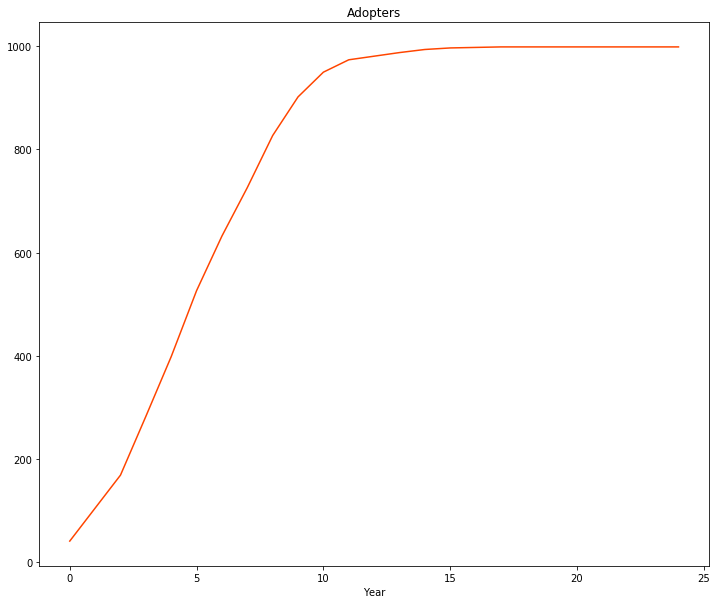

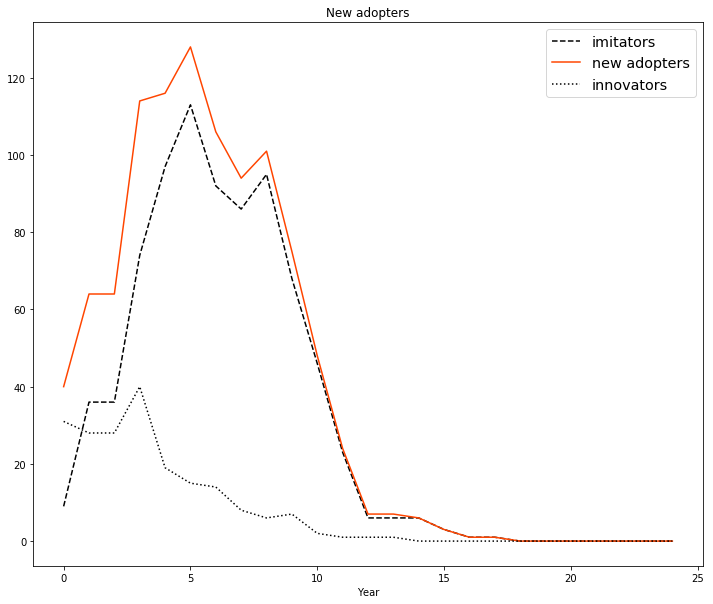

In [13]:
fig = plt.figure(figsize=(12,10))
plt.plot(range(len(result[0])), result[0],color='orangered')
plt.xlabel('Year')
plt.title('Adopters')
fig.savefig('adopters.png', dpi=fig.dpi)


fig, ax = plt.subplots(figsize=(12,10))
ax.plot(range(len(result[1])), result[1], color='black', linestyle='--', label='imitators')
ax.plot(range(len(result[3])), result[3], color='orangered', label='new adopters')
ax.plot(range(len(result[2])), result[2], linestyle=':', color='black', label='innovators')
plt.xlabel('Year')
plt.title('New adopters')
plt.legend(fontsize='x-large')
fig.savefig('new_adopters.png', dpi=fig.dpi)

plt.show()